# Import lib

In [1]:
!pip install --upgrade scikit-learn

In [2]:
!pip install scikit-plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from scikitplot.estimators import plot_learning_curve
from sklearn.metrics import RocCurveDisplay

# Step 1: Read and preprocessing data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Hoc_Tap/CS116_LapTrinhPython/binary_classification/Social_Network_Ads.csv')

In [5]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
zero_count = 0
one_count = 0
for value in np.array(data.Purchased):
  if value == 1:
    one_count += 1
  elif value == 0:
    zero_count += 1

print(zero_count)
print(one_count)


257
143


In [8]:
X = np.array(data.drop(columns=['Purchased']))
y = np.array(data['Purchased'])

# Step 2: Split dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Normalize dataset

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.fit_transform(X_test)

# Step 4: Initialize and train models

## Logistic Regression

In [13]:
LR_model = LogisticRegression(random_state=0)

In [14]:
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
LR_y_predict = LR_model.predict(X_test)

## K-Nearest Neighbor

In [16]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [17]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
KNN_y_predict = neigh.predict(X_test)

## SVM

In [19]:
SVC_model = SVC(gamma='auto')

In [20]:
SVC_model.fit(X_train, y_train)

SVC(gamma='auto')

In [21]:
SVC_y_predict = SVC_model.predict(X_test)

## Linear SVC

In [22]:
li_SVC_model = LinearSVC()

In [23]:
li_SVC_model.fit(X_train, y_train)

LinearSVC()

In [24]:
liSVC_y_predict = li_SVC_model.predict(X_test) 

## Naive Bayes

In [25]:
NB_model = GaussianNB()

In [26]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [27]:
NB_y_predict = NB_model.predict(X_test)

## Decision Tree

In [28]:
tree_model = tree.DecisionTreeClassifier()

In [29]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
tree_y_predict = tree_model.predict(X_test)

## Random Forest

In [31]:
forest_model = RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [33]:
forest_y_predict = forest_model.predict(X_test)

# Step 5: Infer and evaluate the model with accuracy measure

## Logistic Regression

In [34]:
print(classification_report(y_test,LR_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,LR_y_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80

Accuracy Score:  0.8875


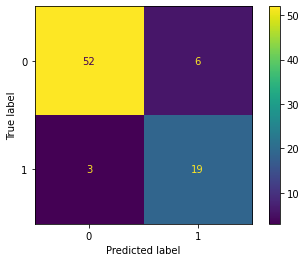

In [35]:
LR_cm = confusion_matrix(y_test, LR_y_predict, labels=LR_model.classes_)
LR_cm_disp = ConfusionMatrixDisplay(confusion_matrix=LR_cm, display_labels=LR_model.classes_)

LR_cm_disp.plot()
plt.show()

## K-Nearest Neighbor

In [36]:
print(classification_report(y_test,KNN_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,KNN_y_predict))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80

Accuracy Score:  0.9375


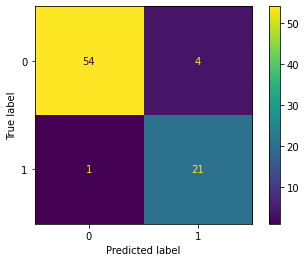

In [37]:
KNN_cm = confusion_matrix(y_test, KNN_y_predict, labels=neigh.classes_)
KNN_cm_disp = ConfusionMatrixDisplay(confusion_matrix=KNN_cm, display_labels=neigh.classes_)

KNN_cm_disp.plot()
plt.show()

## SVM

In [38]:
print(classification_report(y_test,SVC_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,SVC_y_predict))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80

Accuracy Score:  0.9375


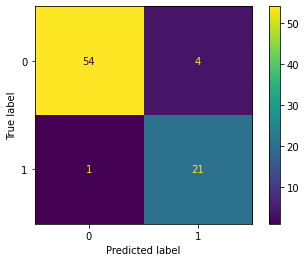

In [39]:
SVC_cm = confusion_matrix(y_test, SVC_y_predict, labels=SVC_model.classes_)
SVC_cm_disp = ConfusionMatrixDisplay(confusion_matrix=SVC_cm, display_labels=SVC_model.classes_)

SVC_cm_disp.plot()
plt.show()

## Linear SVC

In [40]:
print(classification_report(y_test,liSVC_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,liSVC_y_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80

Accuracy Score:  0.8875


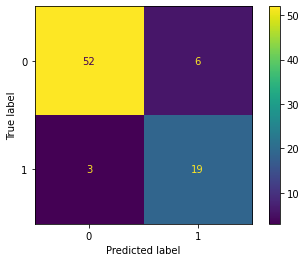

In [41]:
li_SVC_cm = confusion_matrix(y_test, liSVC_y_predict, labels=li_SVC_model.classes_)
li_SVC_cm_disp = ConfusionMatrixDisplay(confusion_matrix=li_SVC_cm, display_labels=li_SVC_model.classes_)

li_SVC_cm_disp.plot()
plt.show()

## Naive Bayes

In [42]:
print(classification_report(y_test,NB_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,NB_y_predict))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80

Accuracy Score:  0.9375


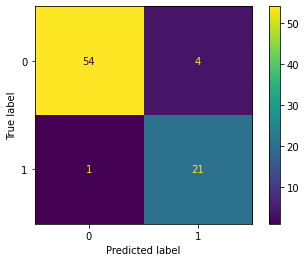

In [43]:
NB_cm = confusion_matrix(y_test, NB_y_predict, labels=NB_model.classes_)
NB_cm_disp = ConfusionMatrixDisplay(confusion_matrix=NB_cm, display_labels=NB_model.classes_)

NB_cm_disp.plot()
plt.show()

## Decision Tree

In [44]:
print(classification_report(y_test,tree_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,tree_y_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.80      0.91      0.85        22

    accuracy                           0.91        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.92      0.91      0.91        80

Accuracy Score:  0.9125


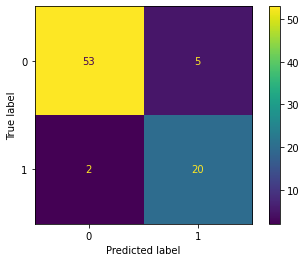

In [45]:
tree_cm = confusion_matrix(y_test, tree_y_predict, labels=tree_model.classes_)
tree_cm_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, display_labels=tree_model.classes_)

tree_cm_disp.plot()
plt.show()

## Random Forest

In [46]:
print(classification_report(y_test,forest_y_predict))
print('Accuracy Score: ',accuracy_score(y_test,forest_y_predict))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.81      0.95      0.88        22

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80

Accuracy Score:  0.925


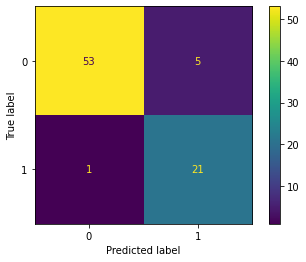

In [47]:
forest_cm = confusion_matrix(y_test, forest_y_predict, labels=forest_model.classes_)
forest_cm_disp = ConfusionMatrixDisplay(confusion_matrix=forest_cm, display_labels=forest_model.classes_)

forest_cm_disp.plot()
plt.show()

# Step 6: Visualize the trained models's results

## Logistic Regression

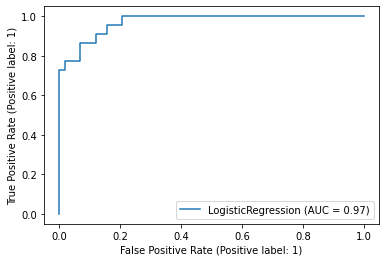

In [48]:
RocCurveDisplay.from_estimator(LR_model, X_test, y_test)

## K-Nearest Neighbor

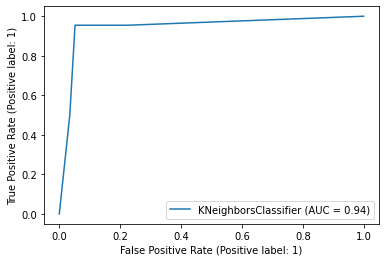

In [51]:
RocCurveDisplay.from_estimator(neigh, X_test, y_test)

## SVM

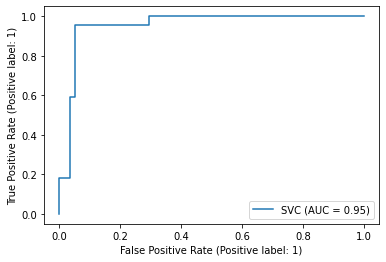

In [52]:
RocCurveDisplay.from_estimator(SVC_model, X_test, y_test)

## Linear SVC

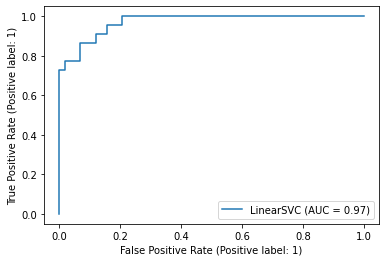

In [53]:
RocCurveDisplay.from_estimator(li_SVC_model, X_test, y_test)

## Naive Bayes

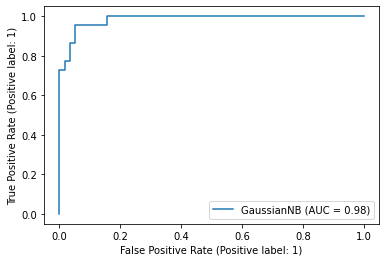

In [54]:
RocCurveDisplay.from_estimator(NB_model, X_test, y_test)

## Decision Tree

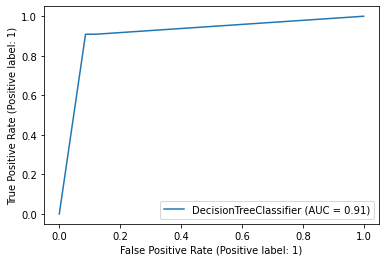

In [55]:
RocCurveDisplay.from_estimator(tree_model, X_test, y_test)

## Random Forest

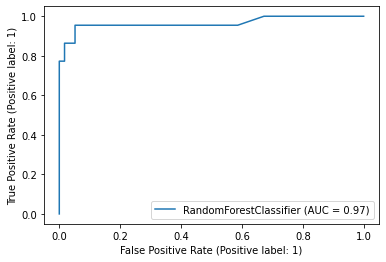

In [56]:
RocCurveDisplay.from_estimator(forest_model, X_test, y_test)

# Step 7: Cross Validation with KFold

In [57]:
kf = KFold(n_splits=5, shuffle=True)

In [58]:
LR_accuracy_list = []
KNN_accuracy_list = []
SVC_accuracy_list = []
li_SVC_accuracy_list = []
NB_accuracy_list = []
tree_accuracy_list = []
forest_accuracy_list = []

X = scaler.fit_transform(X)

for train_index, test_index in kf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  LR_model.fit(X_train, y_train)
  neigh.fit(X_train, y_train)
  SVC_model.fit(X_train, y_train)
  li_SVC_model.fit(X_train, y_train)
  NB_model.fit(X_train, y_train)
  tree_model.fit(X_train, y_train)
  forest_model.fit(X_train, y_train)

  LR_y_predict = LR_model.predict(X_test)
  KNN_y_predict = neigh.predict(X_test)
  SVC_y_predict = SVC_model.predict(X_test)
  liSVC_y_predict = li_SVC_model.predict(X_test)
  NB_y_predict = NB_model.predict(X_test)
  tree_y_predict = tree_model.predict(X_test)
  forest_y_predict = forest_model.predict(X_test)

  LR_accuracy_list.append(accuracy_score(y_test,LR_y_predict))
  KNN_accuracy_list.append(accuracy_score(y_test,KNN_y_predict))
  SVC_accuracy_list.append(accuracy_score(y_test,SVC_y_predict))
  li_SVC_accuracy_list.append(accuracy_score(y_test,liSVC_y_predict))
  NB_accuracy_list.append(accuracy_score(y_test,NB_y_predict))
  tree_accuracy_list.append(accuracy_score(y_test,tree_y_predict))
  forest_accuracy_list.append(accuracy_score(y_test,forest_y_predict))

In [59]:
print('Mean Accuracy Score (Logistic Regression): ',np.mean(LR_accuracy_list))
print('Mean Accuracy Score (KNN): ',np.mean(KNN_accuracy_list))
print('Mean Accuracy Score (SVM): ',np.mean(SVC_accuracy_list))
print('Mean Accuracy Score (Linear SVC): ',np.mean(li_SVC_accuracy_list))
print('Mean Accuracy Score (Naive Bayes): ',np.mean(NB_accuracy_list))
print('Mean Accuracy Score (Decision Tree): ',np.mean(tree_accuracy_list))
print('Mean Accuracy Score (Random Forest): ',np.mean(forest_accuracy_list))

Mean Accuracy Score (Logistic Regression):  0.8375
Mean Accuracy Score (KNN):  0.8975
Mean Accuracy Score (SVM):  0.9075
Mean Accuracy Score (Linear SVC):  0.8424999999999999
Mean Accuracy Score (Naive Bayes):  0.885
Mean Accuracy Score (Decision Tree):  0.8425
Mean Accuracy Score (Random Forest):  0.9125
